In [1]:
from scipy.integrate import quad
def f(x, a):
    return a*x*x

a=3.0
min=0.0
max=1.0
res, err = quad(f, min, max, args=(a,))
print("res", res,"err", err)

res 1.0 err 1.1102230246251565e-14


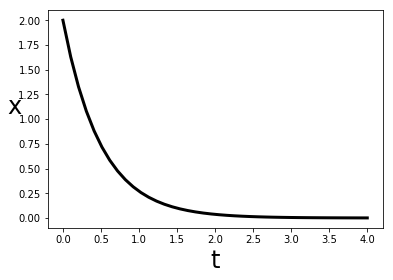

In [3]:
from scipy.integrate import odeint
import numpy as np
import pylab
def diff_op(x, time,a):
    return -a*x

x0 = 2.0
a = 2.0
time = np.linspace(0,4,40)
traject = odeint(diff_op, x0 ,time, args=(a,))
pylab.plot(time, traject, '-k', linewidth=3)
pylab.xlabel('t', fontsize=24)
pylab.ylabel('x', fontsize=24,rotation='horizontal')
pylab.show()

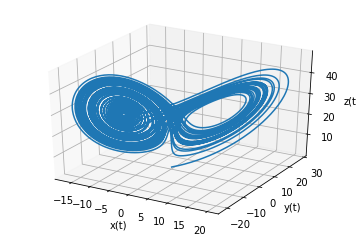

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D# for 3dim plot

# vector fields v1, v2, v3 of Lorenz eq as functions of t, x, y, z.
p, r, b = 10.0, 28.0, 8.0/3.0

def v1(t, x, y, z):
    return(-p * x + p * y)
def v2(t, x, y, z):
    return(-x * z + r * x - y)
def v3(t, x, y, z):
    return(x * y - b * z)

def euler_orbit(x0, T, dt, vectorfield):
    width = len(x0)
    x = x0
    t = 0
    orbit = []
    while t <= T:
        orbit.append(list(x))
        vecx = list(map(lambda v: v(t, *x), vectorfield))
        for i in range(width):
            x[i] += dt * vecx[i]
        #print x,
        t += dt
    return(orbit)

def runge_kutta(x0, T, dt, vectorfield):
    width = len(x0)
    x = x0
    t = 0.0
    orbit = []
    while t <= T:
        orbit.append(list(x))
        x1 = x
        # python3 requests list() as below:
        k1 = list(map(lambda v: v(t, *x1), vectorfield))
        x2 = x
        for i in range(width):
            x2[i] += dt / 2.0 * k1[i]
        k2 = list(map(lambda v: v(t + dt / 2.0, *x2), vectorfield))
        x3 = x
        for i in range(width):
            x3[i] += dt / 2 * k2[i]
        k3 = list(map(lambda v: v(t + dt / 2.0, *x3), vectorfield))
        x4 = x
        for i in range(width):
            x4[i] += dt * k3[i]
        k4 = list(map(lambda v: v(t + dt, *x4), vectorfield))
        for i in range(width):
            x[i] += dt / 6.0 * (k1[i] + 2.0 * k2[i] + 2.0 * k3[i] + k4[i])
        t += dt
    return(orbit)
    
vector = [v1, v2, v3]
x0 = [0.1, 0.1, 0.1]
dt = 0.001
T = 20.0

#orbit = euler_orbit(x0, T, dt, vector)
orbit = runge_kutta(x0, T, dt, vector)
#print(orbit)

nporbit = np.array(orbit)

#xorbit = []
#yorbit = []
#zorbit = []
#for x, y, z in orbit:
#    xorbit.append(x)
#    yorbit.append(y)
#    zorbit.append(z)

# plot in 3-din space
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot(xorbit, yorbit, zorbit)
ax.plot(nporbit[:, 0], nporbit[:, 1], nporbit[:, 2])
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.show()

In [5]:
#%matplotlib notebook
%matplotlib inline
from ipywidgets import interact
import numpy as np

def scatter(num_data):
    x = range(num_data)
    y = [np.sin(t/5.0) for t in x]
    plt.plot(x, y)
    plt.show()

interact(scatter, num_data=(1,200,1), value=2)

interactive(children=(IntSlider(value=100, description='num_data', max=200, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.scatter>

In [14]:
%matplotlib inline
from ipywidgets import interact
import numpy as np

@interact(a=(-10,10,1), b=(-100,100,1), c=(-200,200,1), d=(-20,20,1))
def func(a,b,c,d):
    x = range(-50,50)
    y = [a*t*t+b*t+c for t in x]
    plt.plot(x, y)
    plt.show()


interactive(children=(IntSlider(value=0, description='a', max=10, min=-10), IntSlider(value=0, description='b', min=-100), IntSlider(value=0, description='c', max=200, min=-200), IntSlider(value=0, description='d', max=20, min=-20), Output()), _dom_classes=('widget-interact',))

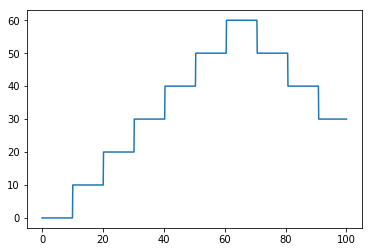

In [31]:
h = [0,10,20,30,40,50,60,50,40,30,20,10,0]
w = 10
dt = 0.1
T = 100

i=0
data=[]
y=h[i]
t=t_w=0
while t<=T:
    if t_w>=w:
        i += 1
        t_w = 0
    y = h[i]
    data.append([t,y])
    t   += dt
    t_w += dt

dat = np.array(data)
#print(data)

plt.plot(dat[:, 0], dat[:, 1])
plt.show()